In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WindPy import w
from scipy import stats
%matplotlib inline

In [23]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

In [24]:
data = w.wsd('881001.WI', 'close', '2010-01-01', '2018-07-12')

In [25]:
pdf = pd.DataFrame(data.Data[0], index=data.Times, columns=['881001.WI'])

In [26]:
df = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/881001.WI.xlsx')

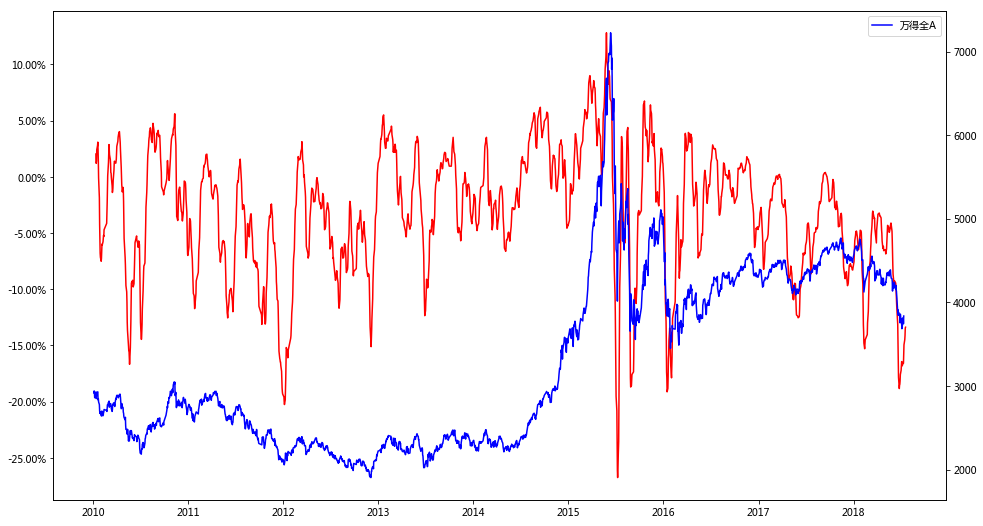

In [27]:
fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(df.index, df['current return'].rolling(window=5).mean(), color='red')
# ax1.plot(df.index, df['current return'].rolling(window=243).mean(), label=u'一年滚动均值')
# ax1.legend()
# ax1.set_title(u'持有成本盈亏', fontsize=15)
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

ax11 = ax1.twinx()
ax11.plot(pdf.index, pdf['881001.WI'], color='blue', label=u'万得全A')
ax11.legend(loc='upper right')

In [85]:
# fig = plt.figure(figsize=(16, 9))
# ax2 = fig.add_subplot(1, 1, 1)
# # ax2.bar(df.index, df['profit percentage'].rolling(5).mean(), color='red', width=1)
# ax2.plot(df.index, df['profit percentage'].rolling(10).mean(), label=u'持仓盈利占比', color='red')
# # ax2.plot(df.index, df['profit percentage'].rolling(window=243).mean(), label=u'一年滚动均值')
# # ax2.legend()
# # ax2.set_title(u'持仓盈利占比', fontsize=15)
# vals = ax2.get_yticks()
# ax2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

# ax22 = ax2.twinx()
# ax22.plot(pdf.index, pdf['881001.WI'], color='blue', label=u'万得全A')
# ax22.legend(loc='upper right')

In [99]:
df.tail()

,turnover days,current return,profit percentage,881001.WI,return,x
2018-07-06,73.157256,-0.176428,0.116709,3706.1205,NaN,-0.176428
2018-07-09,73.277171,-0.156836,0.198412,3798.1284,NaN,-0.156836
2018-07-10,73.318154,-0.148010,0.230798,3817.6416,NaN,-0.148010
2018-07-11,73.403764,-0.164910,0.152161,3744.9268,NaN,-0.164910
2018-07-12,73.341226,-0.141412,0.254370,3836.9795,NaN,-0.141412


In [32]:
df = df.merge(pdf, left_index=True, right_index=True)

In [33]:
df = df[df.index >= '2011-01-01']

In [36]:
df.head()

,turnover days,current return,profit percentage,881001.WI
2011-01-04,35.573944,-0.032574,0.348238,2780.8210
2011-01-05,35.911558,-0.031006,0.349146,2768.9219
2011-01-06,36.321608,-0.034139,0.324889,2754.5686
2011-01-07,36.686087,-0.038150,0.294077,2761.8760
2011-01-10,37.032080,-0.059967,0.194380,2709.3159


In [224]:
K = 20
df['return'] = df['881001.WI'].pct_change(K).shift(-K)

In [275]:
x = df[df['current return'] < 0]['current return']
y = df[df['current return'] < 0]['return']

In [276]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x[:-K], y[:-K])

In [277]:
line = slope * x[:-K] + intercept
print slope, intercept

-0.25780788201268073 -0.01083382663155194


[Text(0,0,'-40.00%'),
 Text(0,0,'-30.00%'),
 Text(0,0,'-20.00%'),
 Text(0,0,'-10.00%'),
 Text(0,0,'0.00%'),
 Text(0,0,'10.00%'),
 Text(0,0,'20.00%'),
 Text(0,0,'30.00%'),
 Text(0,0,'40.00%')]

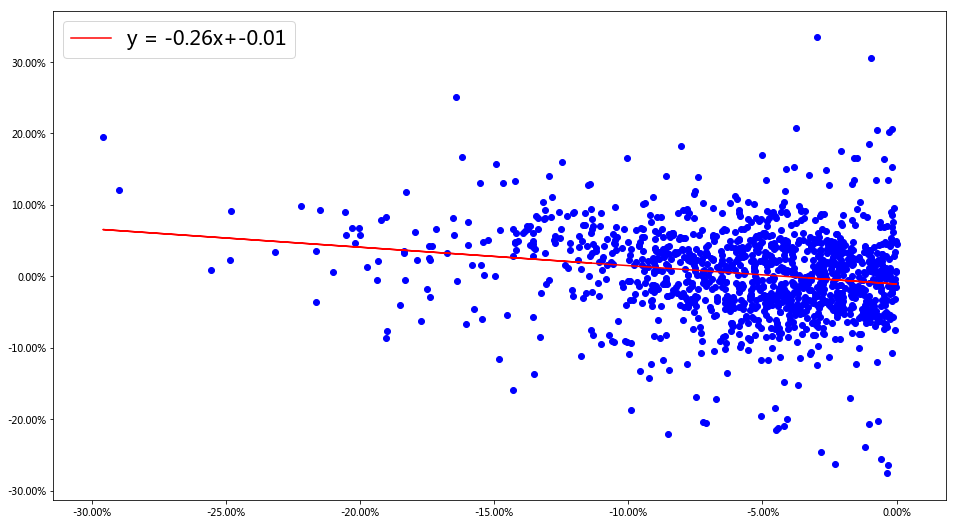

In [278]:
# plt.figure(figsize=(16, 9))
fig, ax = plt.subplots(figsize=(16, 9))
plt.scatter(x, y, color='blue', label='')
plt.plot(x[:-K], line, 'red', label='y = %.2fx+%.2f'%(slope, intercept))
plt.legend(fontsize=20)
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.2f}%'.format(e*100) for e in vals])
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(e*100) for e in vals])

In [266]:
# df.groupby(pd.cut(df['current return'], [-0.3,-0.25,-0.2,-0.15,-0.1,-0.05,0,0.05,0.1])).mean()
groupdf = df.groupby(pd.cut(df['current return'], [-0.25,-0.2,-0.15,-0.1,-0.05,0,0.05,0.1])).mean()

[Text(0,0,'-1.00%'),
 Text(0,0,'0.00%'),
 Text(0,0,'1.00%'),
 Text(0,0,'2.00%'),
 Text(0,0,'3.00%'),
 Text(0,0,'4.00%'),
 Text(0,0,'5.00%'),
 Text(0,0,'6.00%'),
 Text(0,0,'7.00%')]

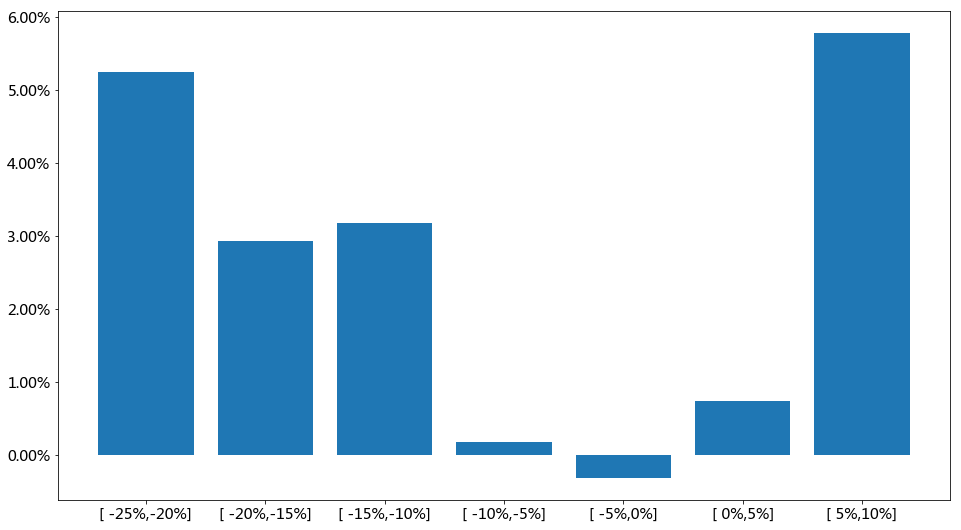

In [282]:
# plt.figure(figsize=(16, 9))
fig, ax = plt.subplots(figsize=(16, 9))
x = np.arange(groupdf.shape[0])
plt.bar(x, groupdf['return'])
plt.xticks(x, ('[ -25%,-20%]', '[ -20%,-15%]', '[ -15%,-10%]', '[ -10%,-5%]', '[ -5%,0%]', '[ 0%,5%]', '[ 5%,10%]'), size=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals], size=15)

In [268]:
slope * df['current return'][-1] + intercept

0.02562336427105725

In [269]:
df['current return'][-1]

-0.1414122431711222

In [270]:
slope * -0.1414122431711222 + intercept

0.02562336427105725

In [271]:
df['return'].mean()

0.007269126353446523